<a href="https://colab.research.google.com/github/wojtekgradzinski/Playground/blob/main/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Self Organizing Map

##Install MiniSom Package

In [1]:
!pip install MiniSom

### Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('/content/Credit_Card_Applications.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values


## Feature Scaling


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)


##Training the SOM


In [5]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5 )
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)


##Visualizing the results


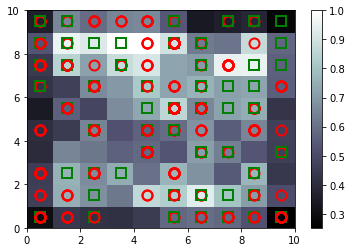

In [12]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
        w[1] + 0.5,
        markers[y[i]],
        markeredgecolor = colors[y[i]],
        markerfacecolor = 'None',
        markersize = 10,
        markeredgewidth = 2)
show()

## Finding the frauds


In [15]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,8)], mappings[(6,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [16]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15585855
15591360
15671293
15580579
15568819
15572390
15575243
15690372
15780088
15750476
15586174
15646563
